In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [5]:
df=pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df=df.dropna(subset=['CustomerID'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,406829,406829,406829,406829
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2077,2070,361878


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Exploratory Data Analysis

In [13]:
new_df=df.copy()
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
new_df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

# represents the total price for each unique quantity of products sold.

In [15]:
new_df['TotalPrice'] = new_df['Quantity'] * new_df['UnitPrice']
result = new_df.groupby('Quantity')['TotalPrice'].sum().reset_index()
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Groupying countries by total amount of sales

In [16]:
country_price=new_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


In [17]:
unique_country_count = new_df['Country'].nunique()

print(unique_country_count)

37


# top 5 companies in sales

<Axes: xlabel='Country'>

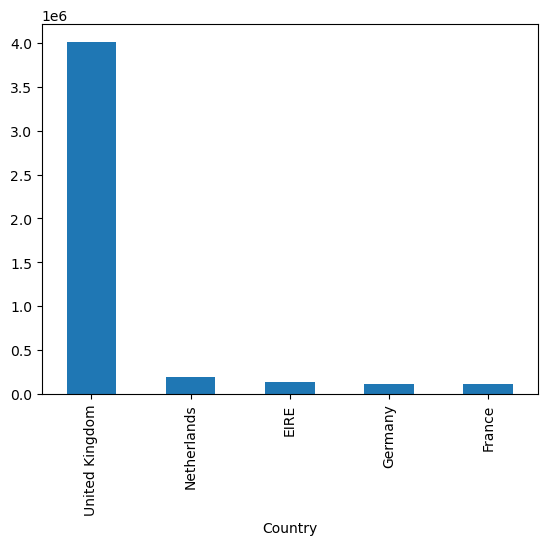

In [18]:
country_price[:5].plot(kind='bar')


# least 5 countries in sales

<Axes: xlabel='Country'>

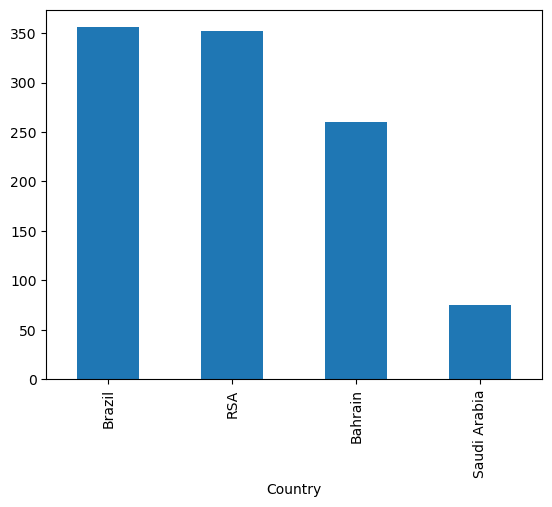

In [19]:
country_price[33:].plot(kind='bar')


In [20]:
new_df['Year'] = new_df['InvoiceDate'].dt.year

new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


In [21]:
yearly_total=new_df.groupby('Year')['TotalPrice'].sum()
yearly_total

Year
2010     554604.020
2011    7745461.794
Name: TotalPrice, dtype: float64

<Axes: xlabel='Year'>

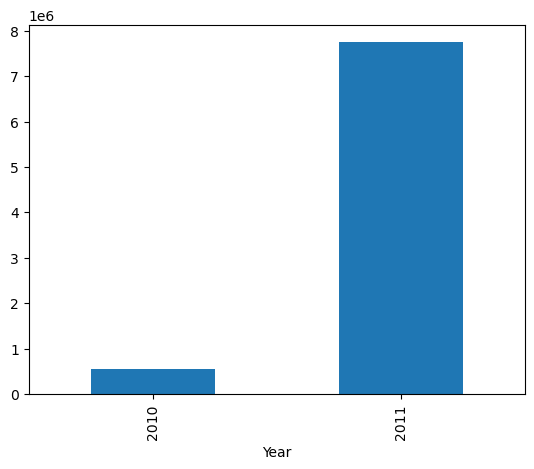

In [22]:
yearly_total.plot(kind='bar')


# RFM analysis

# Recency, Frequency, Monetary values

In [23]:
today_date=new_df['InvoiceDate'].max()
today_date

Timestamp('2011-12-09 12:50:00')

In [24]:
rfm=new_df.groupby('CustomerID').agg({'InvoiceDate':lambda date:(today_date-date.max()).days,
                                    'InvoiceNo':lambda num:num.nunique(),
                                     'TotalPrice':lambda TotalPrice:TotalPrice.sum()})
rfm.columns=['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [25]:
rfm=rfm[rfm['Monetary'] > 0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
12352.0,35,11,1545.41
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [26]:
rfm.describe().T


,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,89.359722,99.137988,0.000000e+00,16.000,48.50,137.00,373.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


In [27]:
rfm.reset_index(drop=True, inplace=True)
rfm

,Recency,Frequency,Monetary
0,1,7,4310.00
1,74,4,1797.24
2,18,1,1757.55
3,309,1,334.40
4,35,11,1545.41
...,...,...,...
4315,277,1,180.60
4316,180,1,80.82
4317,7,3,176.60
4318,3,16,2094.88


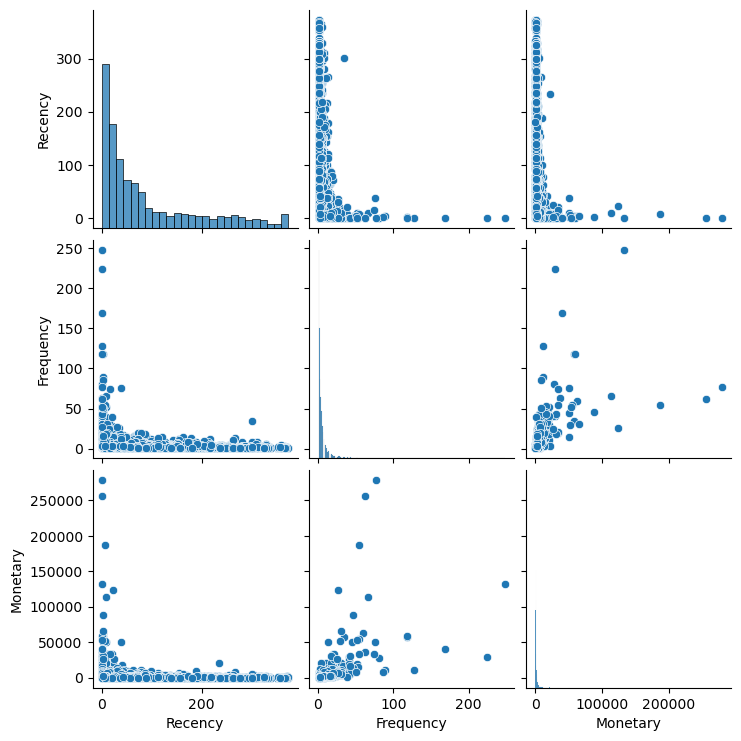

In [28]:
sns.pairplot(rfm)


In [30]:
pca=PCA()
rfm_pca = pca.fit_transform(rfm)
pca.components_

array([[-1.56723381e-03,  6.42477745e-04,  9.99998565e-01],
       [ 9.99838877e-01, -1.78809634e-02,  1.57847168e-03],
       [ 1.78819519e-02,  9.99839916e-01, -6.14350577e-04]])

In [31]:
pca.explained_variance_ratio_

array([9.99857719e-01, 1.41448784e-04, 8.31922921e-07])

In [32]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [35]:
import warnings
warnings.filterwarnings("ignore")
list_of_imirtia=[]
for n in range(1,11):
    km=KMeans(n_clusters=n)
    km.fit(rfm)
    list_of_imirtia.append(km.inertia_)
    print(n,km.inertia_)



1 295070181234.5895
2 99842116804.45987
3 49446944323.47909
4 30116151389.26502
5 17755968375.978806
6 11579565018.240898
7 8362891212.205875
8 5435289326.808342
9 4004561892.952656
10 3080824794.9675875


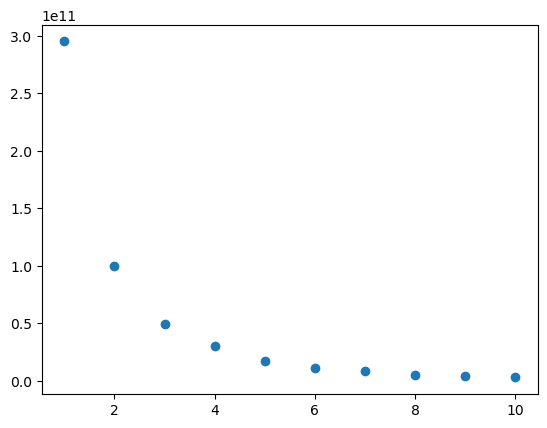

In [37]:
plt.scatter(range(1,11),list_of_imirtia)

In [44]:
km=KMeans(n_clusters=5)
predictions=km.fit_predict(rfm)
predictions

array([0, 0, 0, ..., 0, 0, 0])

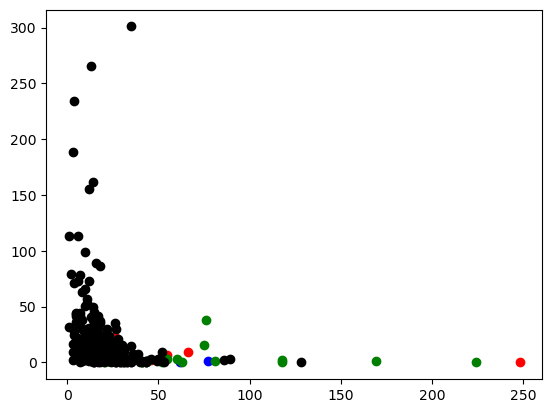

In [45]:
plt.scatter(rfm.iloc[predictions==1,1],rfm.iloc[predictions==1,0], color='red')
plt.scatter(rfm.iloc[predictions==2,1],rfm.iloc[predictions==2,0], color='blue')
plt.scatter(rfm.iloc[predictions==3,1],rfm.iloc[predictions==3,0], color='green')
plt.scatter(rfm.iloc[predictions==4,1],rfm.iloc[predictions==4,0], color='black')
plt.scatter(rfm.iloc[predictions==5,1],rfm.iloc[predictions==5,0], color='cyan')